In [1]:
from tokenizer import BertTokenizer


tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

sent1 = "I went to the store."
sent2 = "At the store, I bought apples."
encoding = tokenizer(sent1, sent2, return_tensors="pt", padding=True, truncation=True)
tokenizer.special_tokens_map, tokenizer.mask_token_id

/Users/zanqiliang/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/zanqiliang/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


({'unk_token': '[UNK]',
  'sep_token': '[SEP]',
  'pad_token': '[PAD]',
  'cls_token': '[CLS]',
  'mask_token': '[MASK]'},
 103)

In [7]:
encoding2 = tokenizer(sent1, return_tensors="pt", padding=True, truncation=True)
encoding2

{'input_ids': tensor([[ 101, 1045, 2253, 2000, 1996, 3573, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [34]:
import torch

token_ids = torch.randint(100, (2, 100))
attention_mask = torch.ones(token_ids.shape, dtype=torch.long)
attention_mask[0][5:] = 0

mask = torch.rand(token_ids.shape) < 0.15
mask = mask & (attention_mask == 1)
mask_mask = (torch.rand(token_ids.shape) < 0.8) & mask
mask_rand = (torch.rand(token_ids.shape) < 0.5) & mask & ~mask_mask

mask.float().mean(), mask_mask.float().mean(), mask_rand.float().mean()

(tensor(0.1150), tensor(0.0800), tensor(0.0250))

In [6]:
from datasets import load_multitask_data
import pandas as pd

sst_train_data, num_labels, para_train_data, sts_train_data = load_multitask_data(
    "data/ids-sst-train.csv", "data/quora-train.csv", "data/sts-train.csv", split="train"
)



Loaded 8544 train examples from data/ids-sst-train.csv
Loaded 141498 train examples from data/quora-train.csv
Loaded 6040 train examples from data/sts-train.csv


count    8544.000000
mean       19.143961
std         9.306133
min         2.000000
25%        12.000000
50%        18.000000
75%        25.000000
max        52.000000
Name: text, dtype: float64


<Axes: >

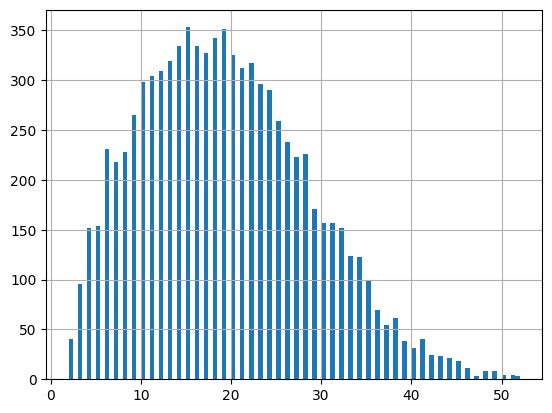

In [25]:
import matplotlib.pyplot as plt

sst_train_data_text = [len(x[0].split()) for x in sst_train_data]
df = pd.DataFrame({"text": sst_train_data_text})
print(df.text.describe())
df.text.hist(bins=100)

count    141498.000000
mean         12.309870
std           5.947266
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          82.000000
Name: text_len, dtype: float64


<Axes: >

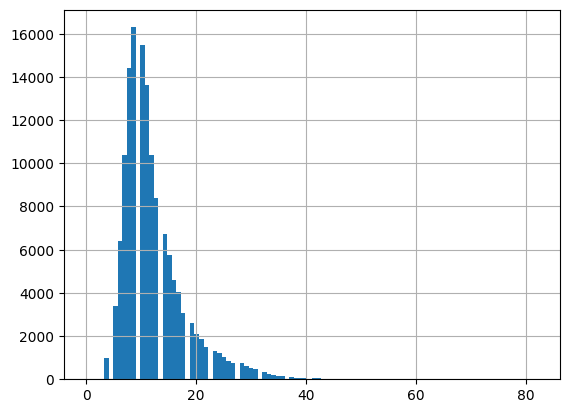

In [26]:
text_len = [len(x[0].split()) for x in para_train_data]
df = pd.DataFrame({"text_len": text_len})
print(df.text_len.describe())
df.text_len.hist(bins=100)

count    6040.000000
mean       11.443543
std         6.185502
min         3.000000
25%         7.000000
50%         9.000000
75%        14.000000
max        61.000000
Name: text_len, dtype: float64


<Axes: >

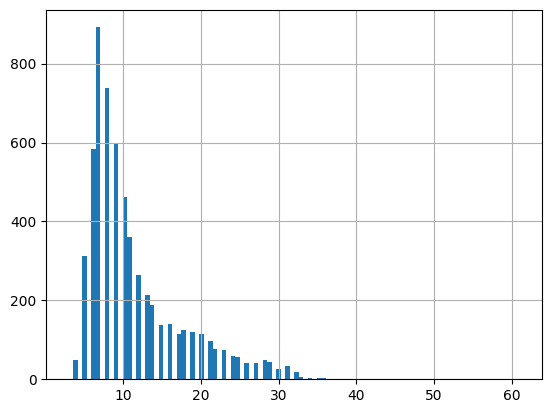

In [27]:
text_len = [len(x[0].split()) for x in sts_train_data]
df = pd.DataFrame({"text_len": text_len})
print(df.text_len.describe())
df.text_len.hist(bins=100)

In [28]:
[x[0].split() for x in sts_train_data]

[['13', 'killed', 'in', 'afgan', 'terror', 'attack'],
 ['china', 'to', 'resume', 'us', 'investment', 'talks'],
 ['but',
  'in',
  'the',
  'first',
  '30',
  'seconds',
  'after',
  'young',
  'entered',
  'the',
  'ring',
  ',',
  'the',
  'family',
  'knew',
  'it',
  'was',
  'an',
  'uneven',
  'match',
  ',',
  'meyers',
  'said',
  '.'],
 ['a', 'yellow', 'vested', 'person', 'is', 'doing', 'road', 'work', '.'],
 ['someone', 'is', 'slicing', 'tortila', "'s", '.'],
 ['capital',
  'offenses',
  'in',
  'saudi',
  'arabia',
  'include',
  'rape',
  ',',
  'murder',
  ',',
  'apostasy',
  ',',
  'armed',
  'robbery',
  'and',
  'drug',
  'trafficking',
  '.'],
 ['no', 'it', 'does', 'not', 'affect', 'your', 'ratings', '.'],
 ['hundreds', 'of', 'bangladesh', 'clothes', 'factory', 'workers', 'ill'],
 ['in',
  'standard',
  'english',
  ',',
  'i',
  'think',
  '"don',
  "'t",
  'got"',
  'has',
  'the',
  'same',
  'register',
  'as',
  '"ain',
  '\'t"',
  '.'],
 ['a',
  'young',
  'girl'